<a href="https://colab.research.google.com/github/HAN-GEONHUI/test/blob/t_academy_%EC%88%98%EC%97%85_pandas/21_DF_groupby(240903).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Group by ###
# --> sql에서 하셨던 그 group by와 동일함--> 기존의 데이터들을 어떻게 묶어서 볼지에 대한 새로운 기준!
# 여러개의 값들을 묶어서 표현 :집계처리(대표값)
# sql) select avg(zumsu) from data group by class;
# pandas) df.group_by(by="class").agg(집계처리)
#         df.group_by(by="class").집계함수

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 10_phone_data.csv 파일 사용하기
path = "/content/10_phone_data.csv"
data = pd.read_csv(path, sep=",")
data.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         830 non-null    int64  
 1   date          830 non-null    object 
 2   duration      830 non-null    float64
 3   item          830 non-null    object 
 4   month         830 non-null    object 
 5   network       830 non-null    object 
 6   network_type  830 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 45.5+ KB


In [ ]:
# ** 자주 사용되는 기능 : 어떤 값이 몇 개가 있냐?
# --> df["~~~"].value_counts()

In [ ]:
data.loc[:,"item"].value_counts()
# --> item 컬럼의 유니크한 값들의 종류와 갯수를
#     + 갯수에 대한 내림차순 자동 정렬

,count
item,
call,388
sms,292
data,150


In [ ]:
# Q) duration 컬럼의 최대 사용시간은 얼마인가요?

In [ ]:
data.loc[:,"duration"].max()

10528.0

In [ ]:
max(data.loc[:,"duration"])

10528.0

In [ ]:
data["duration"].max() # 정식적으로는 .loc/iloc

10528.0

In [ ]:
# 주로 사전에 체크할 때 : df.describe()
data.describe()
# ==> 수치형 컬럼들에 대해서 기본적인 정보 : 최대/.최소/사분위 등..

,index,duration
count,830.000000,830.000000
mean,414.500000,117.804036
std,239.744656,444.129560
min,0.000000,1.000000
25%,207.250000,1.000000
50%,414.500000,24.500000
75%,621.750000,55.000000
max,829.000000,10528.000000


In [ ]:
# Q) item 항목들 중에서 전화인 call인 경우에 대해서 ==> 사용한 시간의 총합을 구해보세요!!!

In [ ]:
# select sum(duration) from data where item ="call";
data[ data.loc[:,"item"]=="call"]["duration"].sum()

92321.0

In [ ]:
# FM
data.loc[ data.loc[:,"item"]=="call", "duration"].sum()

92321.0

In [ ]:
# month에 대한 종류와 건수를 체크!
data.loc[:,"month"].value_counts()

,count
month,
2014-11,230
2015-01,205
2014-12,157
2015-02,137
2015-03,101


In [ ]:
# 주어진 데이터들을 월별값을 기준으로 묶어서 보자--> 관찰의 대상이 데이터 사용건별이 아니라
#     월별로 묶어서 바라보자===> 전체 830건의 개별 사용 데이터를 5개의 월별로 묶어서 보자

In [ ]:
data.groupby(by="month")
# --> 아래와 같이 눈으로 안 보이지만,DF으로 생각!

In [ ]:
data.groupby(by="month").groups

{'2014-11': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], '2014-12': [228, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, ...], '2015-01': [381, 386, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 3

In [ ]:
data.groupby(by="month").groups.keys()

dict_keys(['2014-11', '2014-12', '2015-01', '2015-02', '2015-03'])

In [ ]:
data.loc[:,"month"].unique()

array(['2014-11', '2014-12', '2015-01', '2015-02', '2015-03'],
      dtype=object)

In [ ]:
# ==> DF에서 groupby를 하면, 실질적인 정체가 안 보임
#     + 뒤에 뭔가 구체적인 엑션을 하면 구체적인 데이터가 보임
data.groupby(by="month").head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile
228,228,13/11/14 06:58,34.429,data,2014-12,data,data
231,231,14/11/14 06:58,34.429,data,2014-12,data,data
232,232,14/11/14 17:24,124.000,call,2014-12,voicemail,voicemail
233,233,14/11/14 17:28,1.000,sms,2014-12,Vodafone,mobile
234,234,15/11/14 06:58,34.429,data,2014-12,data,data


In [ ]:
# month별로 사용시간에 대한 평균값을 구해보면?

In [ ]:
pd.pivot_table( data, index=["month"],
               values =["duration"],
                aggfunc =["mean"])

,mean
,duration
month,
2014-11,115.823657
2014-12,93.260318
2015-01,88.894141
2015-02,113.301453
2015-03,225.251891


In [ ]:
type(pd.pivot_table( data, index=["month"],
               values =["duration"],
                aggfunc =["mean"]))

pandas.core.frame.DataFrame

In [ ]:
data.groupby(by="month")["duration"].mean()

,duration
month,
2014-11,115.823657
2014-12,93.260318
2015-01,88.894141
2015-02,113.301453
2015-03,225.251891


In [ ]:
type(data.groupby(by="month")["duration"].mean())

pandas.core.series.Series

In [ ]:
# Q) item 컬럼의 값 중에서 종류가 call인 경우에 한해서(전화통화)
#     network 통신사별로 duration 총 합을 구해보자!!!!
# ==> 통신사별로 전화 사용시간의 차이가 있는지 체크!!!

In [ ]:
data.loc[ data.loc[:,"item"]=="call",:].groupby(by="network")["duration"].sum()

,duration
network,
Meteor,7200.0
Tesco,13828.0
Three,36464.0
Vodafone,14621.0
landline,18433.0
voicemail,1775.0


In [ ]:
data.groupby(by="network")["duration"].sum()

,duration
network,
Meteor,7233.00
Tesco,13841.00
Three,36551.00
Vodafone,14770.00
data,5164.35
landline,18433.00
special,3.00
voicemail,1775.00
world,7.00


In [ ]:
# 참고) 묶는 기준이 1개 아니라 여러개 일 수 있음..
# --> Manager / Rep
# --> month   / item 몇 건인지 보자..

In [ ]:
data.groupby(by=["month","item"])["date"].count()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: date, dtype: int64

In [ ]:
# ex- sql) select avg(zumsu), sum(date) from data
#                   group by class, sex

In [ ]:
# + 보려고 하는 항목이 각가 존재한다.....
data.groupby(by=["month","item"]).agg(
    {
        "date":"first",
        "duration":"sum"
    }
)

date   duration
month   item                           
2014-11 call  15/10/14 06:58  25547.000
        data  15/10/14 06:58    998.441
        sms   16/10/14 22:18     94.000
2014-12 call  14/11/14 17:24  13561.000
        data  13/11/14 06:58   1032.870
        sms   14/11/14 17:28     48.000
2015-01 call  15/12/14 20:03  17070.000
        data  13/12/14 06:58   1067.299
        sms   15/12/14 19:56     86.000
2015-02 call  15/01/15 10:36  14416.000
        data  13/01/15 06:58   1067.299
        sms   15/01/15 12:23     39.000
2015-03 call  12/02/15 20:15  21727.000
        data  13/02/15 06:58    998.441
        sms   19/02/15 18:46     25.000

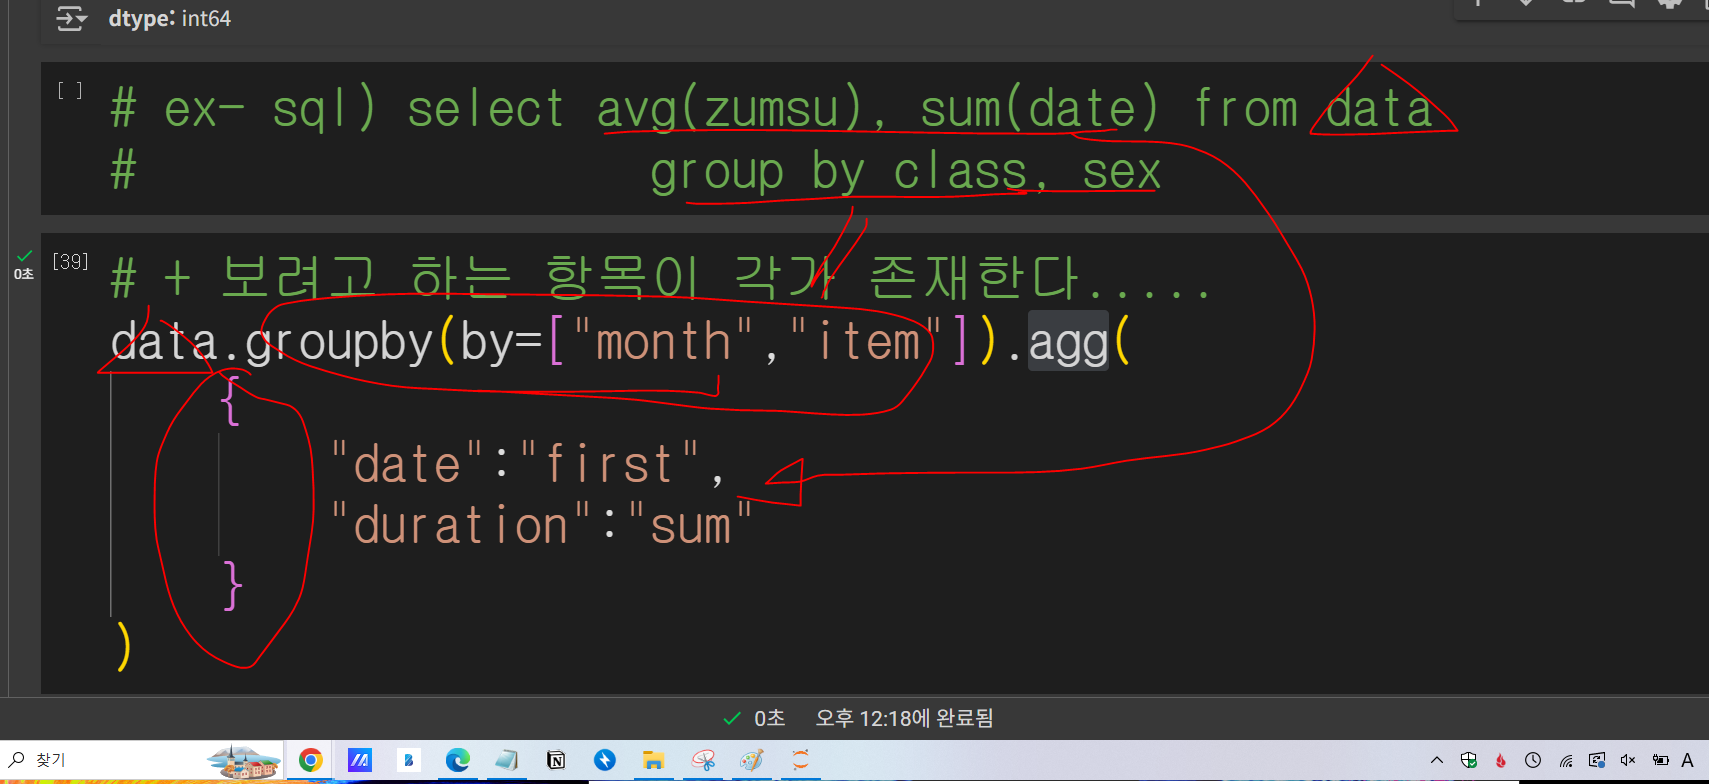